In [ ]:
PROJECT -> ATTRITION ANALYSIS [GRADUALL LOSS OF EMPLOYEES IN A COMPANY]

XYZ  COMPANY which  thrives on values like innovation  and collaboration has faced a 
persistent challenge of high ATTRITION RATE  in couple of years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Attrition data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [6]:
df.shape
# 4410 employees hai and 29 fetures(columns) hai

(4410, 29)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [18]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [12]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [14]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [42]:
df[['Age','YearsWithCurrManager']].corr()
# ese aur columns ka nikal sakte hai

,Age,YearsWithCurrManager
Age,1.000000,0.202089
YearsWithCurrManager,0.202089,1.000000


### EDA(exploratory data analysis)
purpose is to understand the data in and out.
#doing univariate analysis , bivariate analysis and multivariate analysis

In [ ]:
data -> NUMERICAL or CATEGORICAL

In [ ]:
# in univariate we mostly focus on data visualisation to get better insights,to find hidden data aye

In [ ]:
attrition -> categorical  
Department  
JobRole 
BusinessTravel 
Education
EducationField
Gender
JobLevel
JobRole
MaritalStatus
NumCompaniesWorked -> chance
StockOptionLevel

-> convert karlo inko categorica mai
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
JobInvolvement
PerformanceRating

######  identify categorical variables and their unique values

In [43]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [46]:
df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [47]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [48]:
df['Education'].unique()

array([2, 1, 4, 5, 3], dtype=int64)

In [49]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [50]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [51]:
df['JobLevel'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [52]:
df['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [53]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [55]:
df['NumCompaniesWorked'].unique()

array([ 1.,  0.,  3.,  4.,  2.,  7.,  9.,  5.,  6.,  8., nan])

In [56]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [57]:
df['TotalWorkingYears'].unique()

array([ 1.,  6.,  5., 13.,  9., 28., 10., 21., 16., 37.,  7.,  3., 15.,
        8., nan, 12., 17., 19., 22.,  2.,  4., 23.,  0., 11., 24., 25.,
       20., 14., 26., 18., 30., 36., 31., 33., 32., 34., 40., 29., 35.,
       27., 38.])

In [58]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [59]:
df['StandardHours'].unique()

array([8], dtype=int64)

In [60]:
df['TrainingTimesLastYear'].unique()

array([6, 3, 2, 5, 4, 0, 1], dtype=int64)

In [61]:
df['YearsAtCompany'].unique()

array([ 1,  5,  8,  6,  7,  0,  9, 20, 15, 36, 10,  3, 17,  2,  4, 11, 22,
       18, 13, 24, 21, 16, 25, 29, 27, 14, 31, 32, 34, 26, 12, 19, 33, 30,
       23, 37, 40], dtype=int64)

In [62]:
df['YearsWithCurrManager'].unique()

array([ 0,  4,  3,  5,  7,  8, 10, 11, 13,  9,  1,  2,  6, 12, 17, 16, 15,
       14], dtype=int64)

In [63]:
df['YearsSinceLastPromotion'].unique()

array([ 0,  1,  7,  4, 10,  9,  6, 11,  3,  5,  2,  8, 13, 12, 15, 14],
      dtype=int64)

In [64]:
df['EnvironmentSatisfaction'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [65]:
df['JobSatisfaction'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [67]:
df['WorkLifeBalance'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [68]:
df['JobInvolvement'].unique()

array([3, 2, 1, 4], dtype=int64)

In [69]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

###### univariate analysis on categorical column

In [5]:
3699 + 711


4410

In [3]:
df['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

<Axes: xlabel='Attrition'>

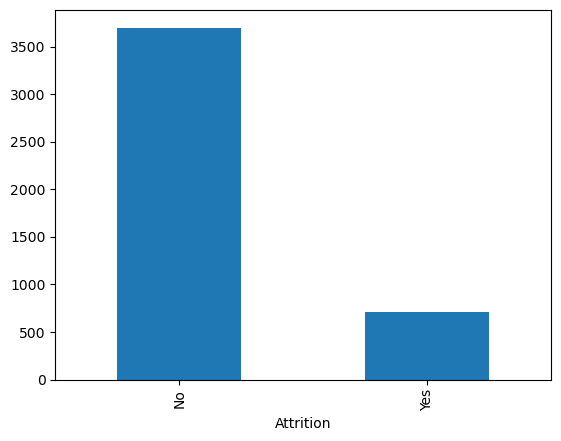

In [3]:
# attrition
df['Attrition'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

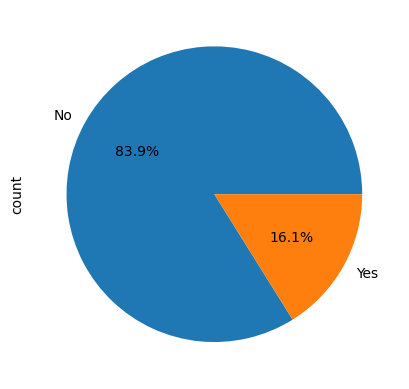

In [73]:
# or
df['Attrition'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Department'>

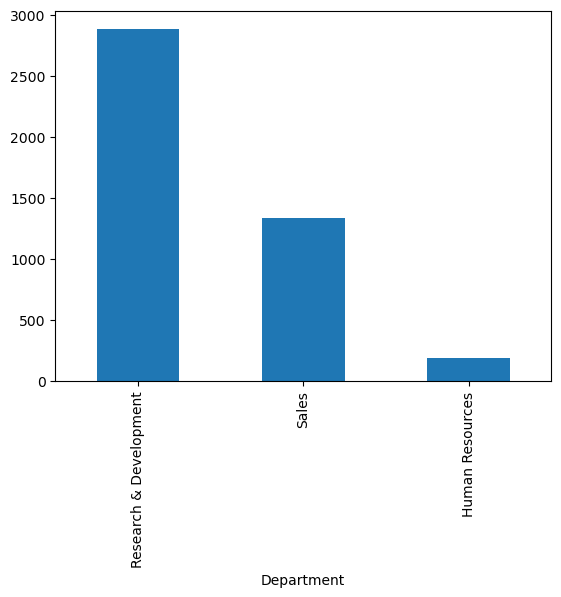

In [74]:
# Department
df['Department'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

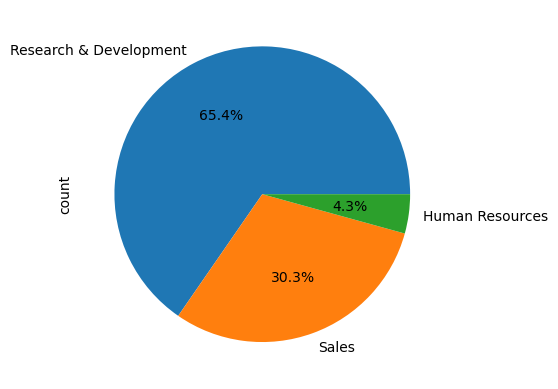

In [75]:
# or
df['Department'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='JobRole'>

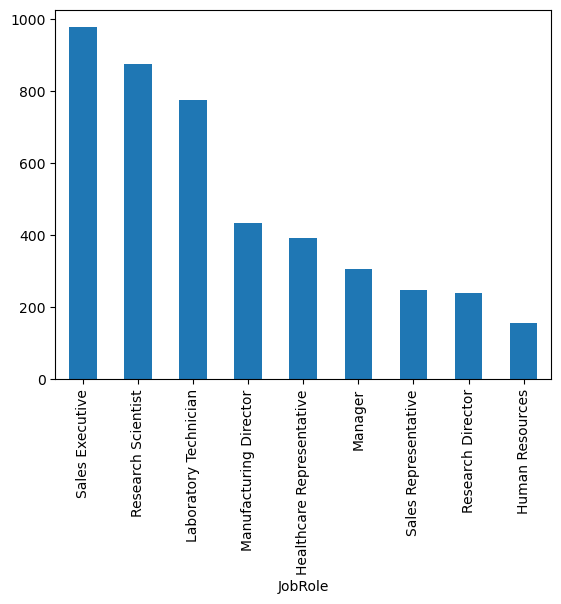

In [76]:
# JobRole
df['JobRole'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

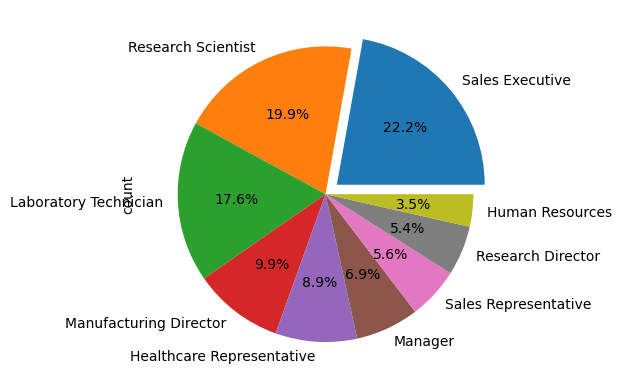

In [85]:
# or
df['JobRole'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.1,0,0,0,0,0,0,0,0])

In [ ]:
df['BusinessTravel'].unique()

<Axes: xlabel='BusinessTravel'>

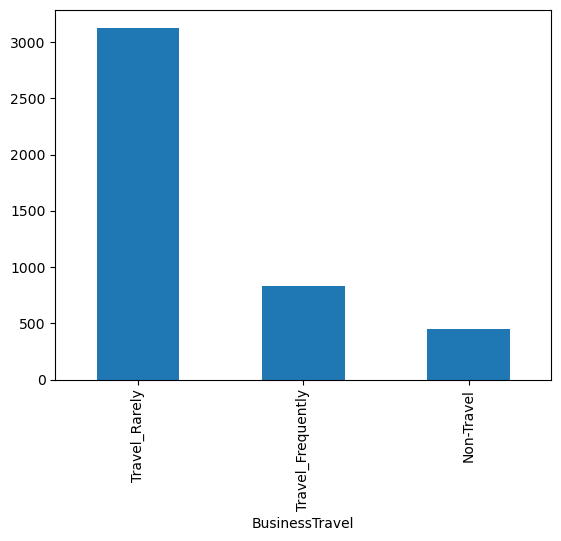

In [90]:
# BusinessTravel
df['BusinessTravel'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

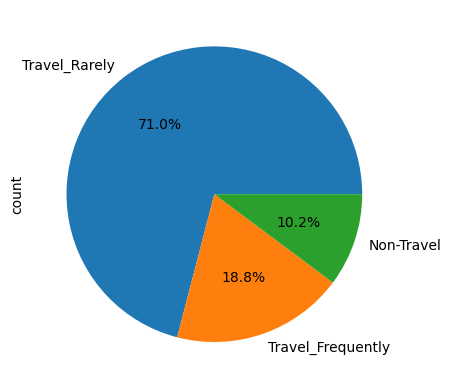

In [91]:
# or
df['BusinessTravel'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='StockOptionLevel'>

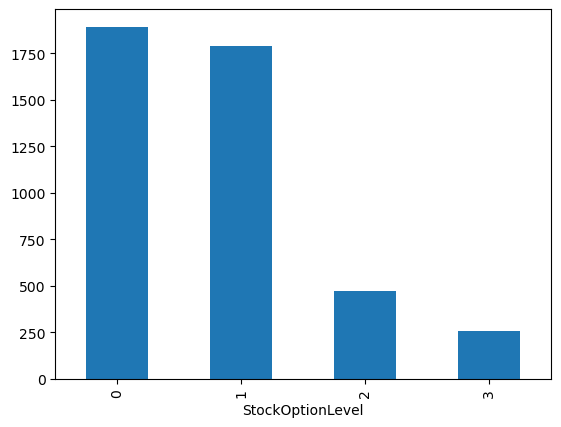

In [94]:
# StockOptionLevel
df['StockOptionLevel'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

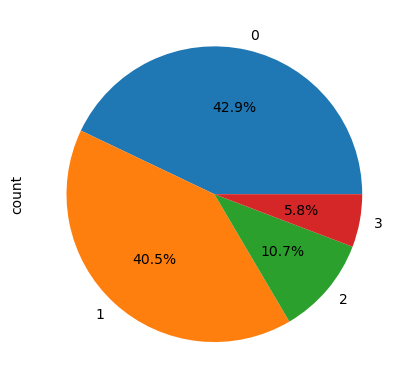

In [93]:
# or
df['StockOptionLevel'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
EnvironmentSatisfaction

<Axes: xlabel='EnvironmentSatisfaction'>

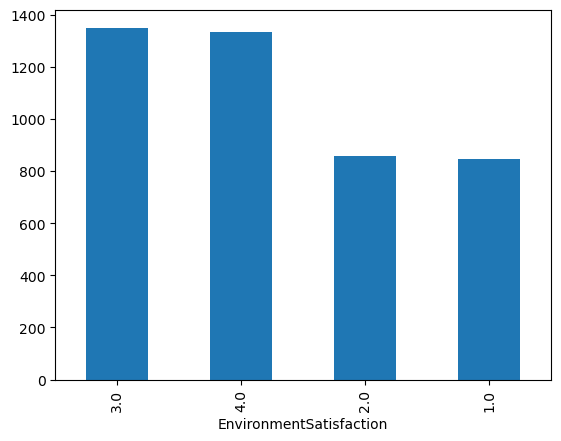

In [95]:
# BusinessTravel
df['EnvironmentSatisfaction'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

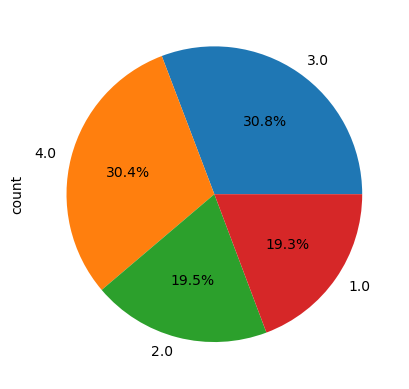

In [96]:
# or
df['EnvironmentSatisfaction'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='JobSatisfaction'>

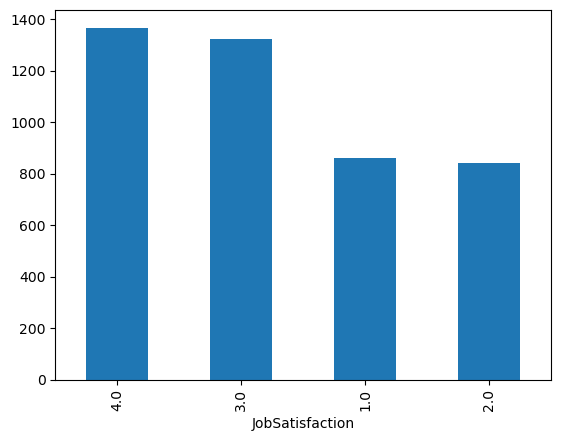

In [97]:
# JobSatisfaction
df['JobSatisfaction'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

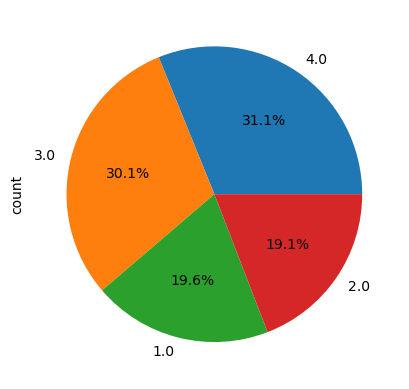

In [98]:
# or
df['JobSatisfaction'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='WorkLifeBalance'>

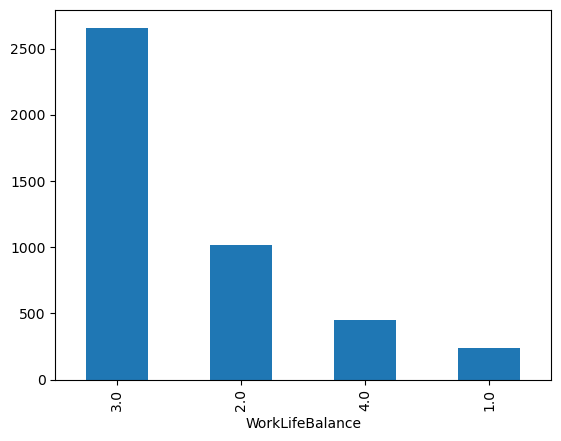

In [99]:
# WorkLifeBalance
df['WorkLifeBalance'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

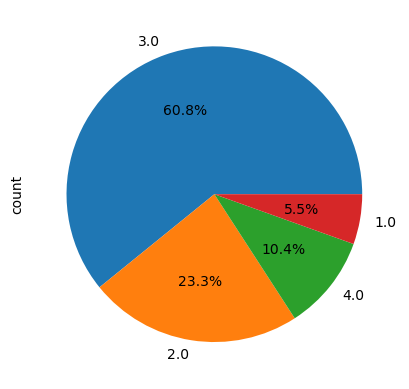

In [100]:
# or
df['WorkLifeBalance'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
JobInvolvement
PerformanceRating

<Axes: xlabel='JobInvolvement'>

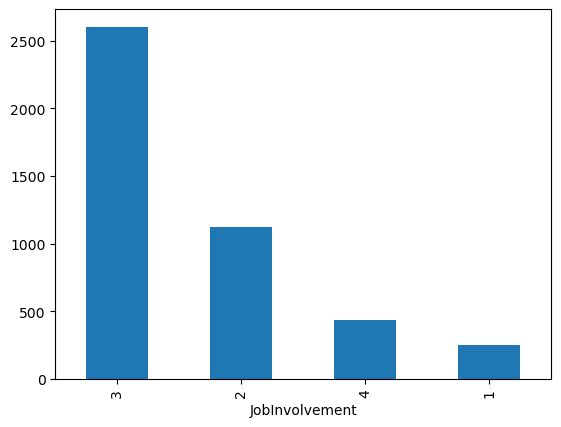

In [101]:
# JobInvolvement
df['JobInvolvement'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

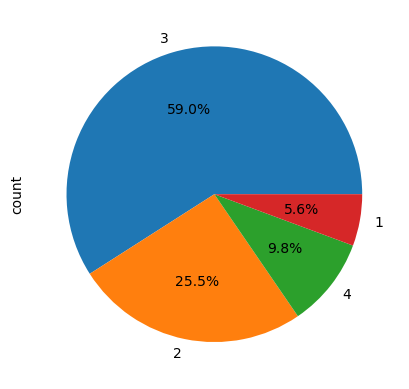

In [102]:
# or
df['JobInvolvement'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='PerformanceRating'>

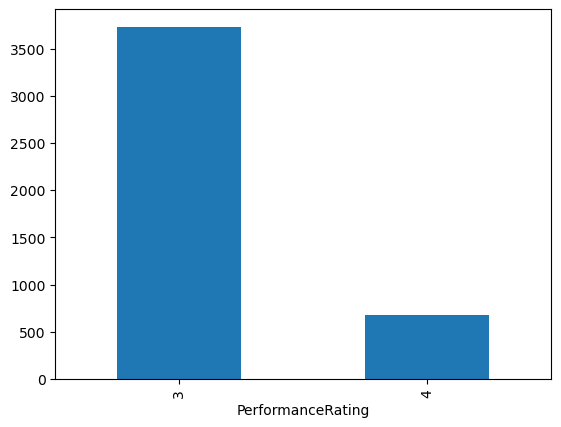

In [103]:
# WorkLifeBalance
df['PerformanceRating'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

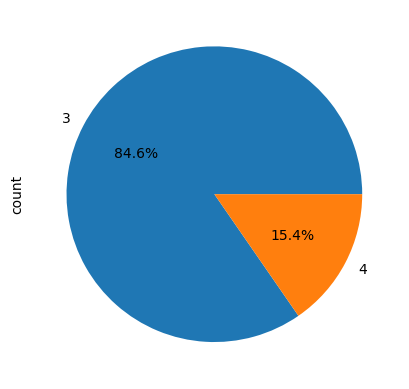

In [104]:
# or
df['PerformanceRating'].value_counts().plot(kind='pie',autopct='%0.1f%%')

###### univariate analysis on numerical column

In [ ]:
attrition -> categorical  
Department  
JobRole 
BusinessTravel 
Education
EducationField
Gender
JobLevel
JobRole
MaritalStatus
NumCompaniesWorked -> chance
StockOptionLevel

-> convert karlo inko categorica mai
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
JobInvolvement
PerformanceRating

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

<Axes: xlabel='Age', ylabel='Count'>

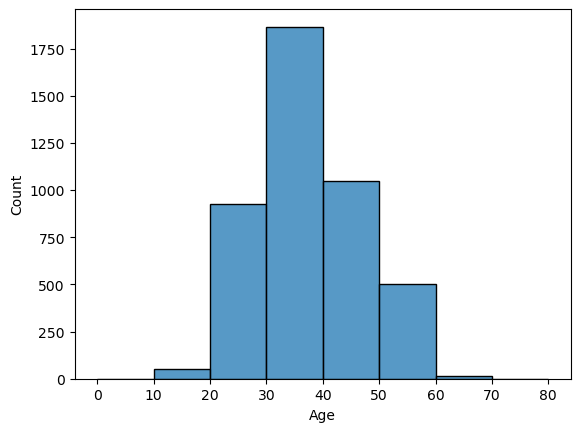

In [115]:
# Age
sns.histplot(data=df,x='Age',bins=[0,10,20,30,40,50,60,70,80])

<Axes: xlabel='Age', ylabel='Density'>

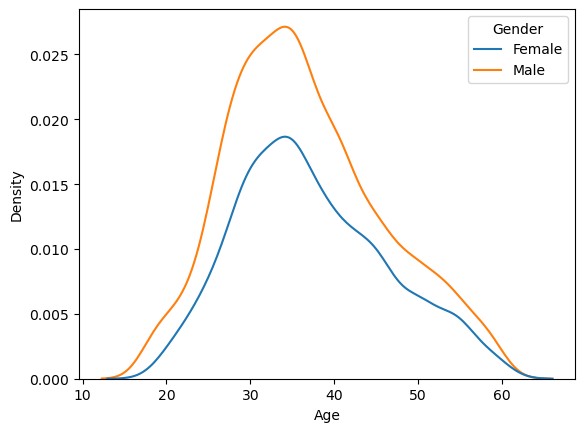

In [116]:
sns.kdeplot(data=df,x='Age',hue='Gender')

<Axes: xlabel='Age'>

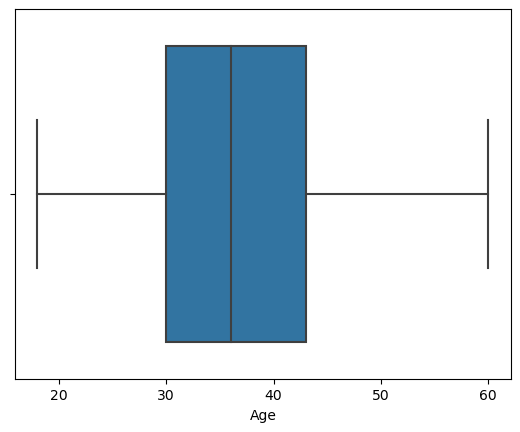

In [122]:
sns.boxplot(x='Age',data=df)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

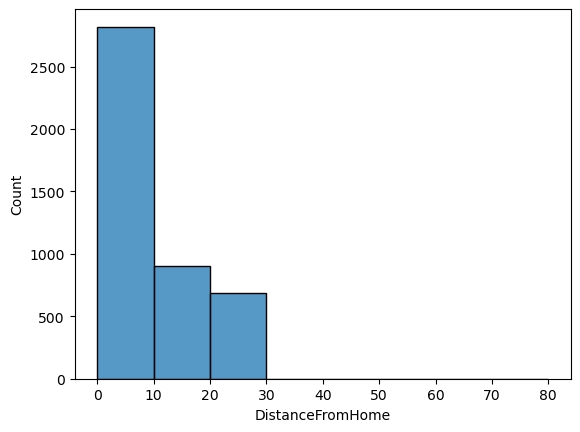

In [120]:
# DistanceFromHome
sns.histplot(data=df,x='DistanceFromHome',bins=[0,10,20,30,40,50,60,70,80])

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

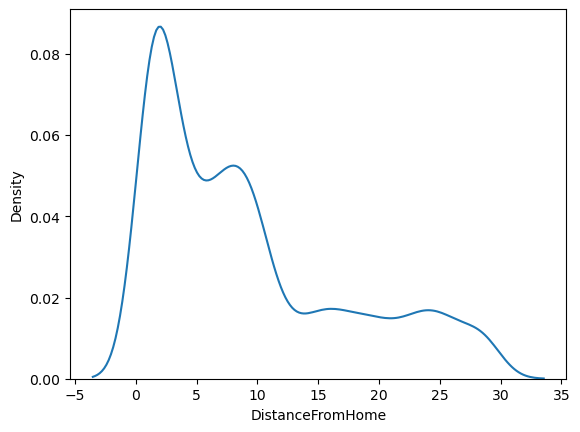

In [121]:
sns.kdeplot(data=df,x='DistanceFromHome')

<Axes: xlabel='DistanceFromHome'>

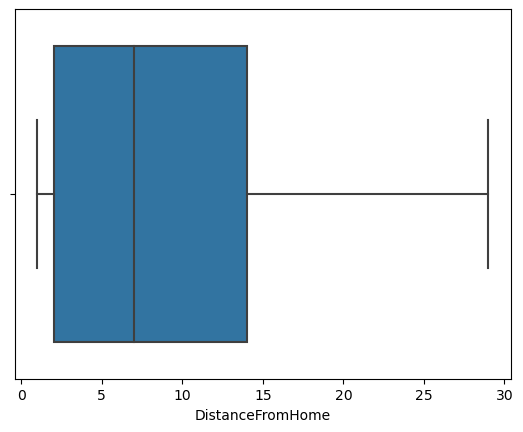

In [123]:
sns.boxplot(x='DistanceFromHome',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

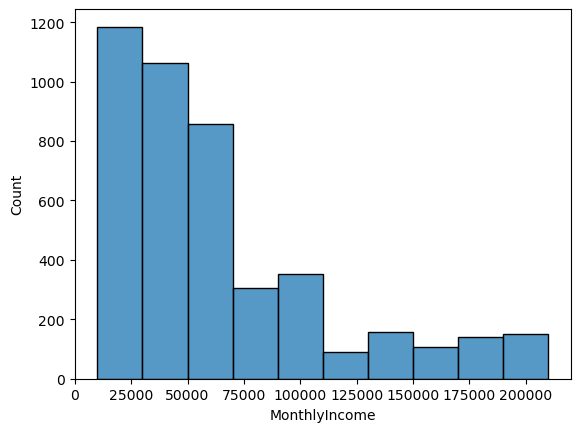

In [136]:
# MonthlyIncome
sns.histplot(data=df,x='MonthlyIncome',bins=[10000,30000,50000,70000,90000,110000,130000,150000,170000,190000,210000])

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

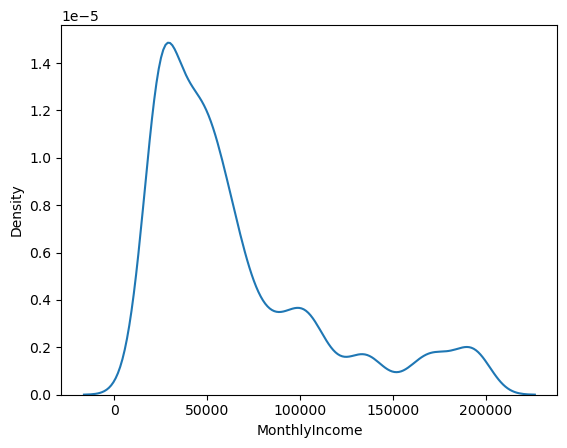

In [138]:
sns.kdeplot(data=df,x='MonthlyIncome')

<Axes: xlabel='MonthlyIncome'>

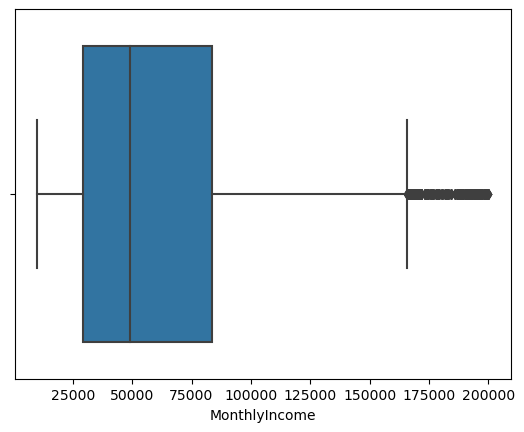

In [139]:
sns.boxplot(x='MonthlyIncome',data=df)

<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

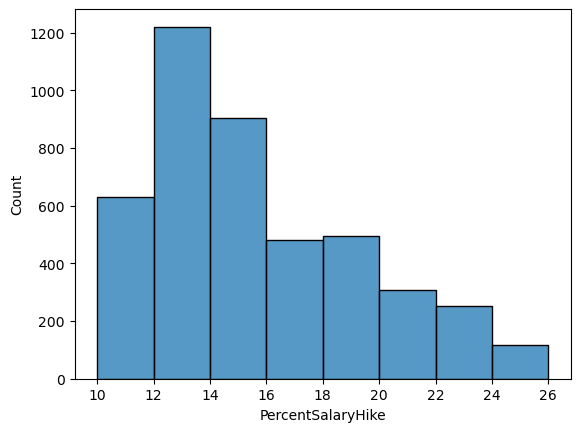

In [147]:
# PercentSalaryHike
sns.histplot(data=df,x='PercentSalaryHike',bins=[10,12,14,16,18,20,22,24,26])

<Axes: xlabel='PercentSalaryHike', ylabel='Density'>

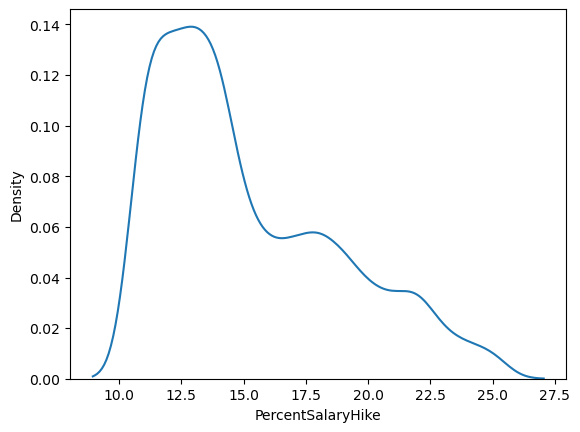

In [149]:
sns.kdeplot(data=df,x='PercentSalaryHike')

<Axes: xlabel='PercentSalaryHike'>

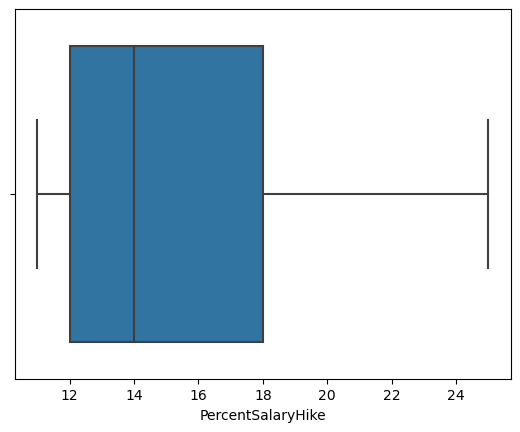

In [150]:
sns.boxplot(x='PercentSalaryHike',data=df)

In [152]:
df['StandardHours'].unique()

array([8], dtype=int64)

In [ ]:
# StockOptionLevel
sns.histplot(data=df,x='StockOptionLevel',bins=[10000,30000,50000,70000,90000,110000,130000,150000,170000,190000,210000])

In [ ]:
sns.kdeplot(data=df,x='StockOptionLevel')

In [ ]:
sns.boxplot(x='StockOptionLevel',data=df)

In [ ]:
TotalWorkingYears        4401 non-null   float64
 20  TrainingTimesLastYear    4410 non-null   int64  
 21  YearsAtCompany           4410 non-null   int64  
 22  YearsSinceLastPromotion  4410 non-null   int64  
 23  YearsWithCurrManager  

array([ 1.,  6.,  5., 13.,  9., 28., 10., 21., 16., 37.,  7.,  3., 15.,
        8., nan, 12., 17., 19., 22.,  2.,  4., 23.,  0., 11., 24., 25.,
       20., 14., 26., 18., 30., 36., 31., 33., 32., 34., 40., 29., 35.,
       27., 38.])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

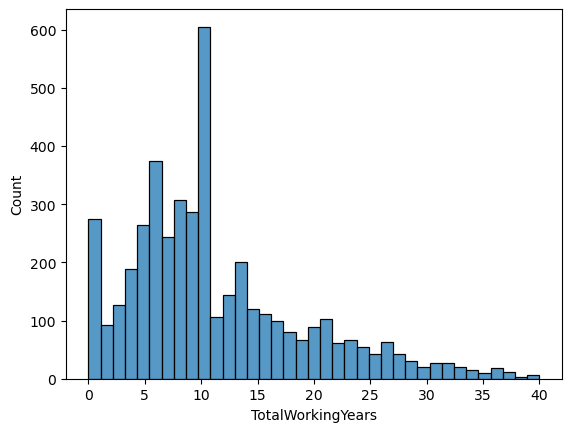

In [156]:
# TotalWorkingYears
sns.histplot(data=df,x='TotalWorkingYears')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

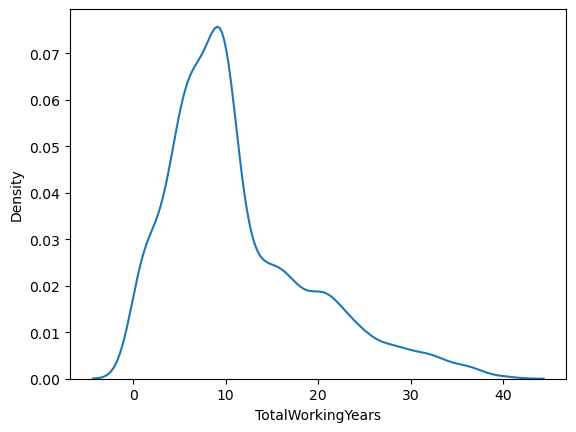

In [157]:
sns.kdeplot(data=df,x='TotalWorkingYears')

<Axes: xlabel='TotalWorkingYears'>

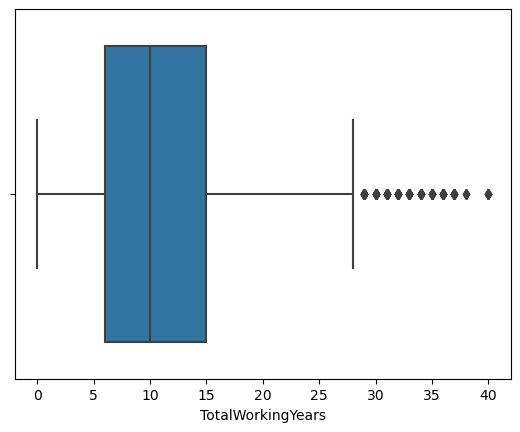

In [158]:
sns.boxplot(x='TotalWorkingYears',data=df)

<Axes: xlabel='TrainingTimesLastYear', ylabel='Count'>

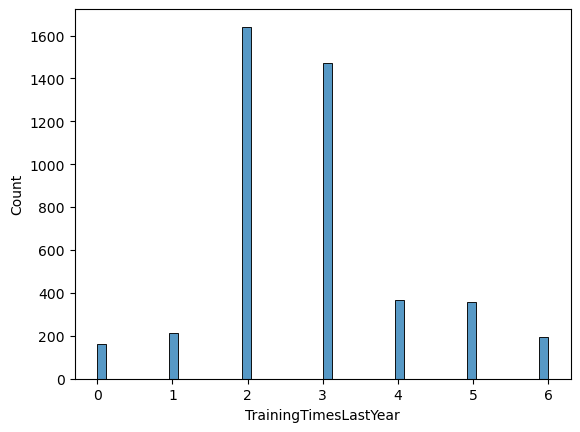

In [159]:
# TrainingTimesLastYear
sns.histplot(data=df,x='TrainingTimesLastYear')

<Axes: xlabel='TrainingTimesLastYear', ylabel='Density'>

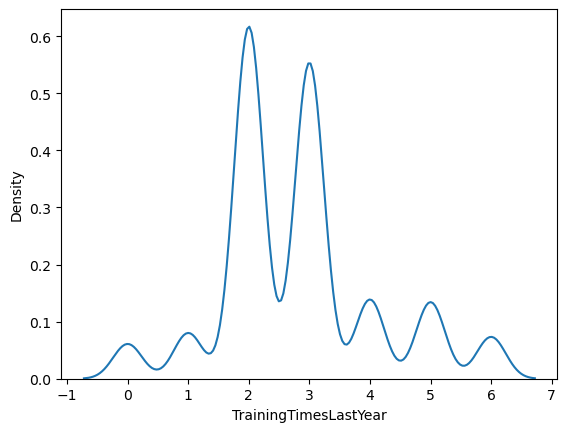

In [160]:
sns.kdeplot(data=df,x='TrainingTimesLastYear')

<Axes: xlabel='TrainingTimesLastYear'>

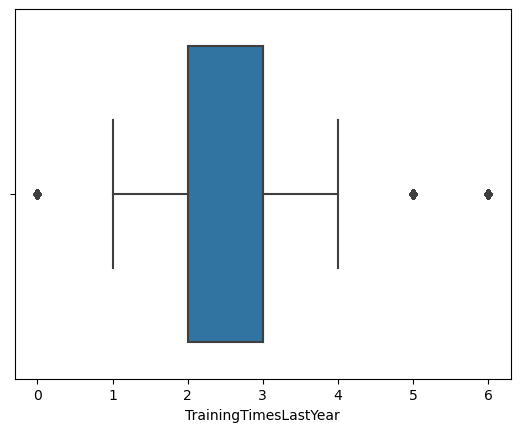

In [161]:
sns.boxplot(x='TrainingTimesLastYear',data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

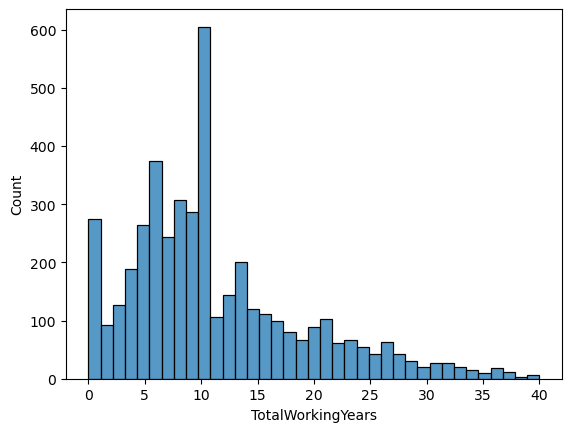

In [162]:
# TotalWorkingYears
sns.histplot(data=df,x='TotalWorkingYears')

<Axes: xlabel='TrainingTimesLastYear', ylabel='Density'>

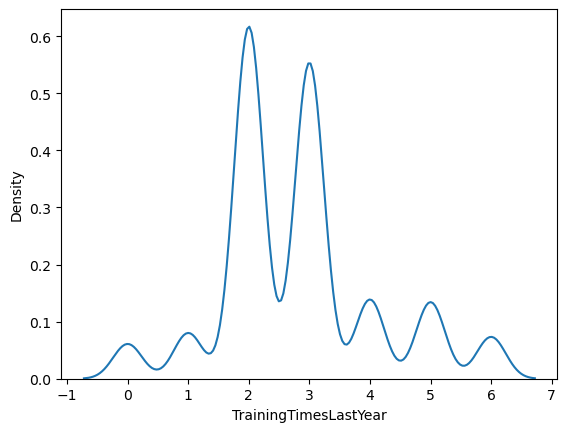

In [163]:
sns.kdeplot(data=df,x='TrainingTimesLastYear')

<Axes: xlabel='TrainingTimesLastYear'>

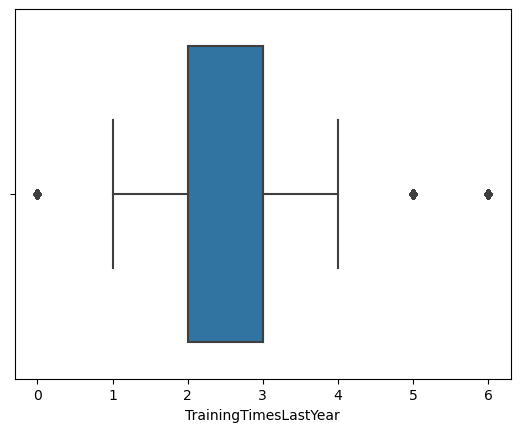

In [164]:
sns.boxplot(x='TrainingTimesLastYear',data=df)

<Axes: xlabel='TrainingTimesLastYear', ylabel='Density'>

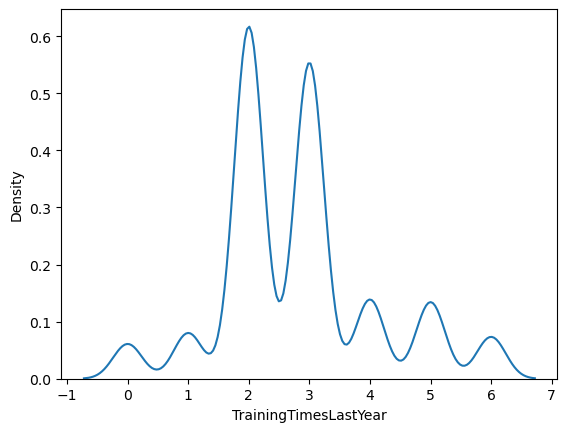

In [165]:
sns.kdeplot(data=df,x='TrainingTimesLastYear')

<Axes: xlabel='TrainingTimesLastYear'>

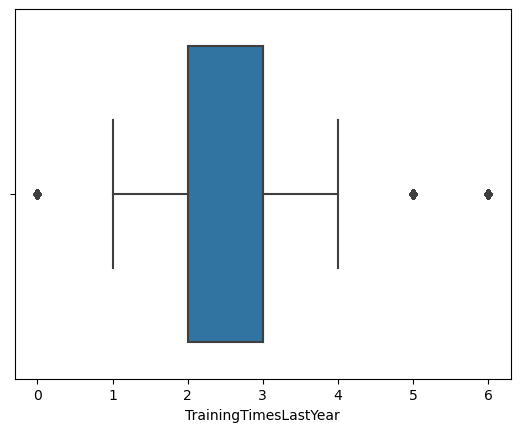

In [166]:
sns.boxplot(x='TrainingTimesLastYear',data=df)

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

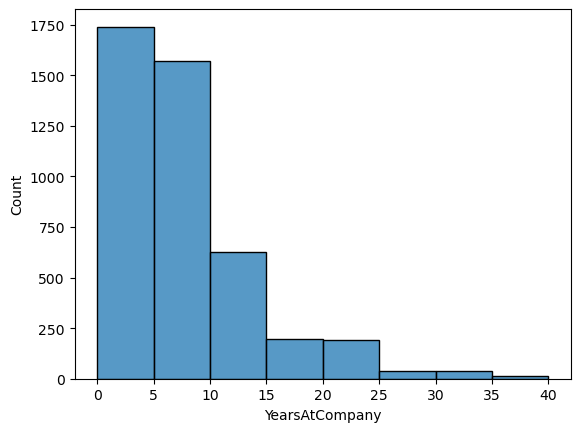

In [172]:
# YearsAtCompany 
sns.histplot(data=df,x='YearsAtCompany',bins=[0,5,10,15,20,25,30,35,40])

In [171]:
df['YearsAtCompany'].unique()

array([ 1,  5,  8,  6,  7,  0,  9, 20, 15, 36, 10,  3, 17,  2,  4, 11, 22,
       18, 13, 24, 21, 16, 25, 29, 27, 14, 31, 32, 34, 26, 12, 19, 33, 30,
       23, 37, 40], dtype=int64)

<Axes: xlabel='YearsAtCompany', ylabel='Density'>

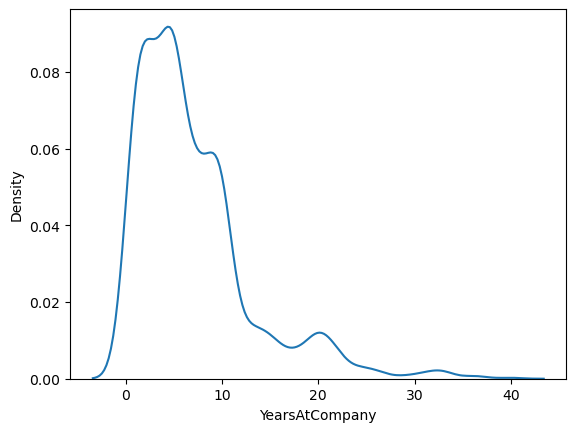

In [169]:
sns.kdeplot(data=df,x='YearsAtCompany')

<Axes: xlabel='YearsAtCompany'>

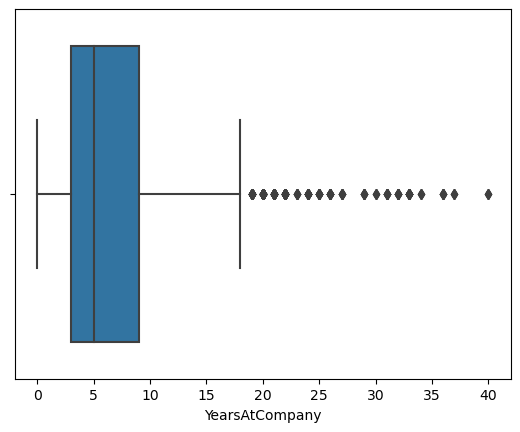

In [170]:
sns.boxplot(x='YearsAtCompany',data=df)

In [ ]:
YearsSinceLastPromotion  4410 non-null   int64  
 23  YearsWithCurrManager 

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

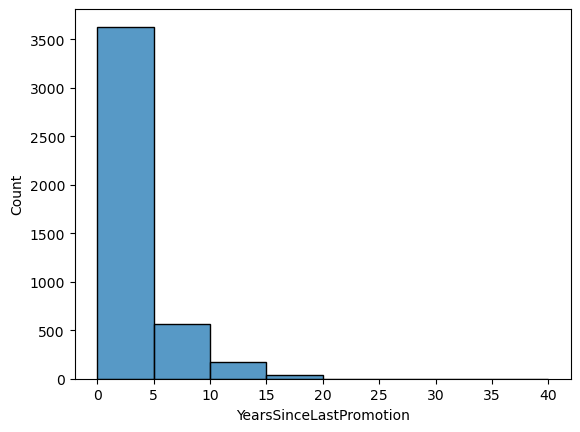

In [174]:
# YearsSinceLastPromotion 
sns.histplot(data=df,x='YearsSinceLastPromotion',bins=[0,5,10,15,20,25,30,35,40])

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Density'>

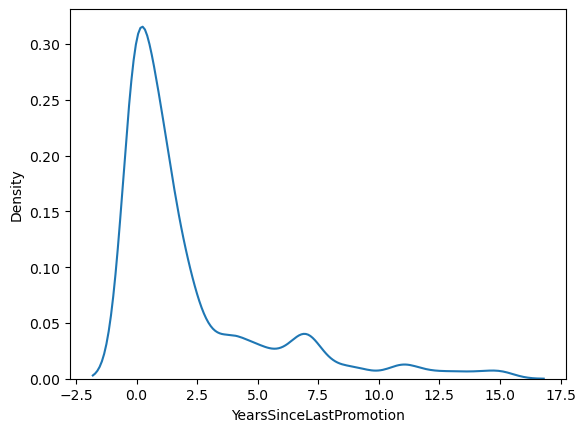

In [175]:
sns.kdeplot(data=df,x='YearsSinceLastPromotion')

<Axes: xlabel='YearsSinceLastPromotion'>

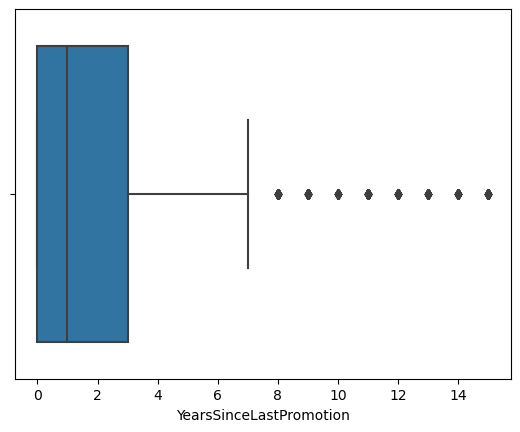

In [176]:
sns.boxplot(x='YearsSinceLastPromotion',data=df)

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

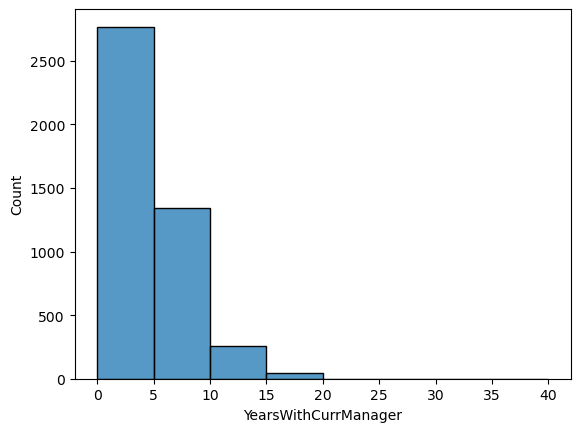

In [177]:
# YearsWithCurrManager
sns.histplot(data=df,x='YearsWithCurrManager',bins=[0,5,10,15,20,25,30,35,40])

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

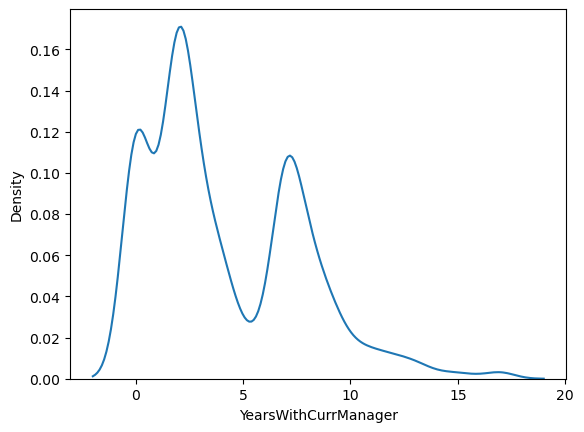

In [178]:
sns.kdeplot(data=df,x='YearsWithCurrManager')

<Axes: xlabel='YearsWithCurrManager'>

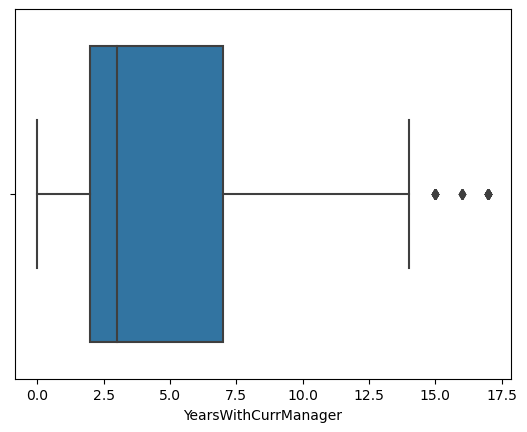

In [180]:
sns.boxplot(x='YearsWithCurrManager',data=df)

<Axes: xlabel='PerformanceRating', ylabel='Count'>

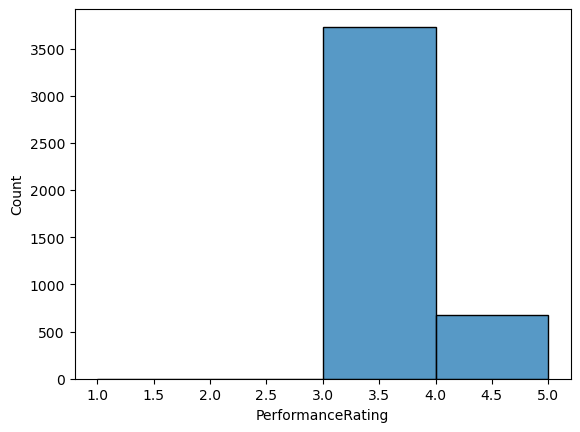

In [182]:
# PerformanceRating
sns.histplot(data=df,x='PerformanceRating',bins=[1,2,3,4,5])

<Axes: xlabel='PerformanceRating', ylabel='Density'>

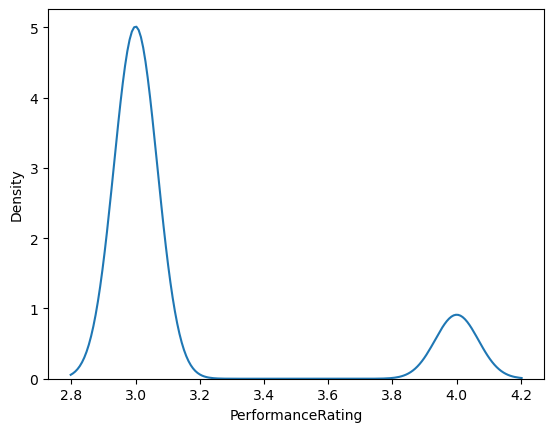

In [183]:
sns.kdeplot(data=df,x='PerformanceRating')

<Axes: xlabel='PerformanceRating'>

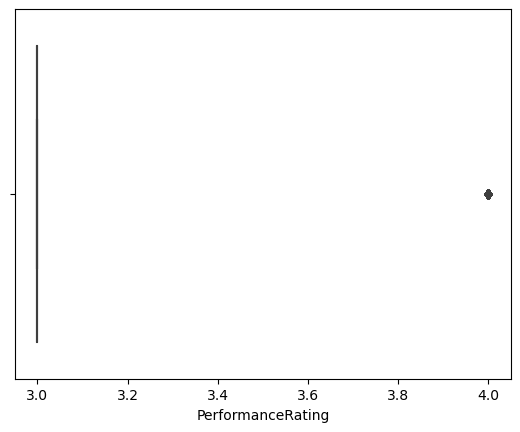

In [186]:
sns.boxplot(x='PerformanceRating',data=df)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

###### BIVARIATE AND MULTIVARIATE  ANALYSIS

In [ ]:
2 columns -BIVARIATE analysis
more than 2 columns - MultiVARIATE analysis

In [ ]:
data type 3 categories
numerical - numerical
numerical - categorical
categorical - categorical

In [ ]:
# numerical numerical

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

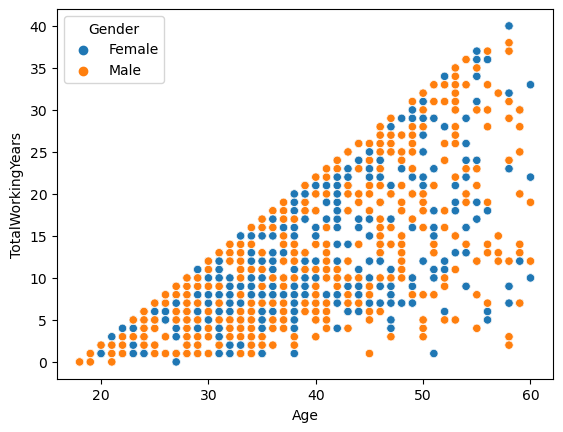

In [193]:
sns.scatterplot(data=df,x='Age',y='TotalWorkingYears',hue='Gender')

<Axes: xlabel='Age', ylabel='YearsAtCompany'>

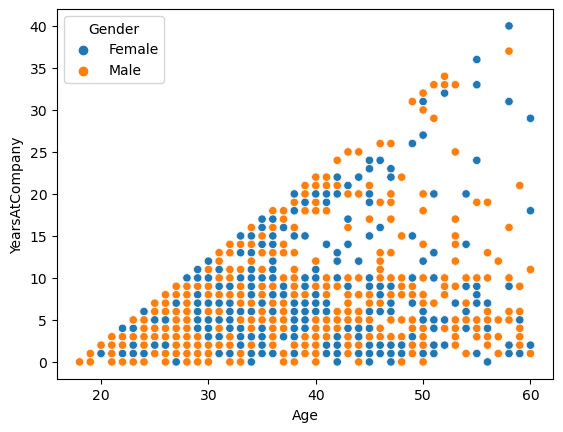

In [194]:
sns.scatterplot(data=df,x='Age',y='YearsAtCompany',hue='Gender')

<Axes: xlabel='YearsAtCompany', ylabel='TrainingTimesLastYear'>

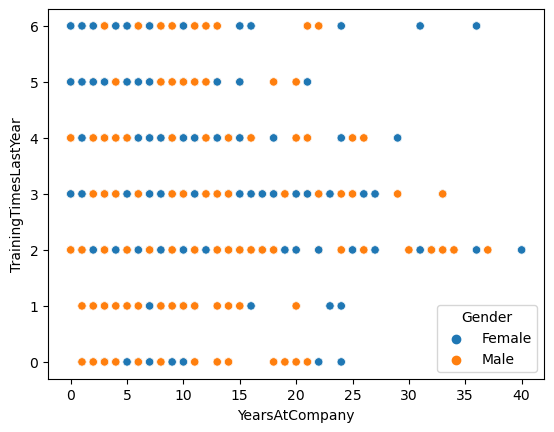

In [195]:
sns.scatterplot(data=df,x='YearsAtCompany',y='TrainingTimesLastYear',hue='Gender')

<Axes: xlabel='TrainingTimesLastYear', ylabel='YearsAtCompany'>

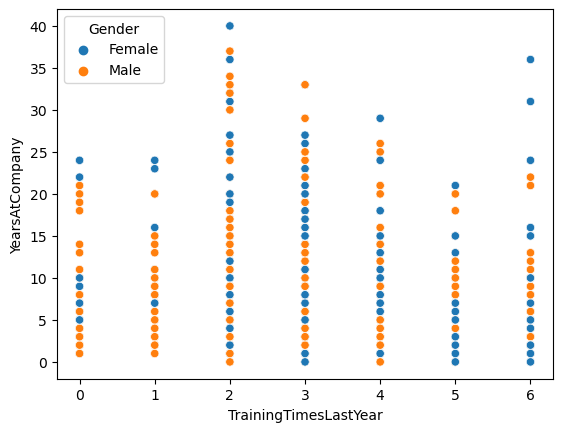

In [196]:
sns.scatterplot(data=df,x='TrainingTimesLastYear',y='YearsAtCompany',hue='Gender')

In [ ]:
# numerical and categorical

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

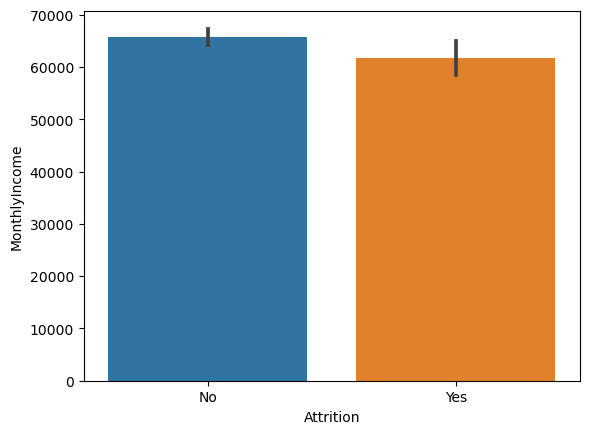

In [198]:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)

In [ ]:
DistanceFromHome

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

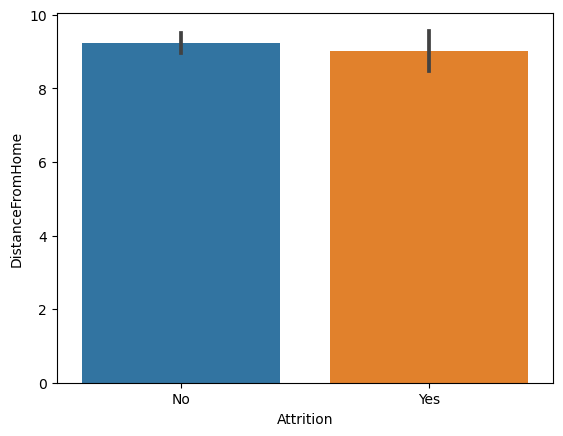

In [199]:
sns.barplot(x='Attrition',y='DistanceFromHome',data=df)

In [ ]:
# categorical - categorical 

In [200]:
pd.crosstab(df['Gender'],df['Attrition'])

Attrition,No,Yes
Gender,,
Female,1494,270
Male,2205,441


<Axes: xlabel='Attrition', ylabel='Gender'>

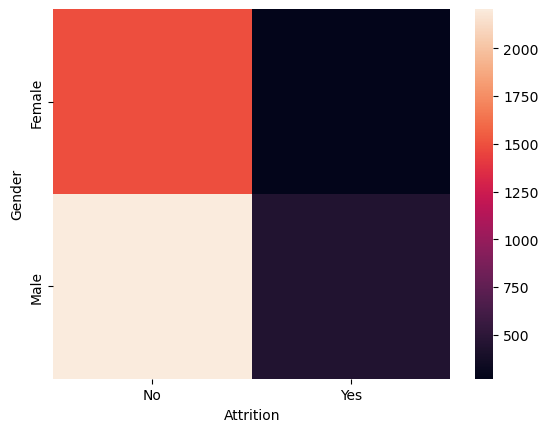

In [201]:
sns.heatmap(pd.crosstab(df['Gender'],df['Attrition']))

In [ ]:
sns.pairplot(df)

In [ ]:
# PANDAS PROFILING

In [2]:
pip install --upgrade anaconda-cloud-auth

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='p2(ii).html')

C:\Users\sahus\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [32]:
import seaborn as sns

<Axes: xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

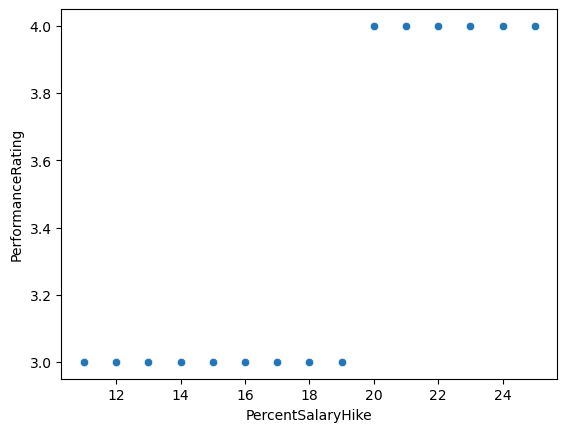

In [4]:
sns.scatterplot(x='PercentSalaryHike',y='PerformanceRating',data=df)

<Axes: xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

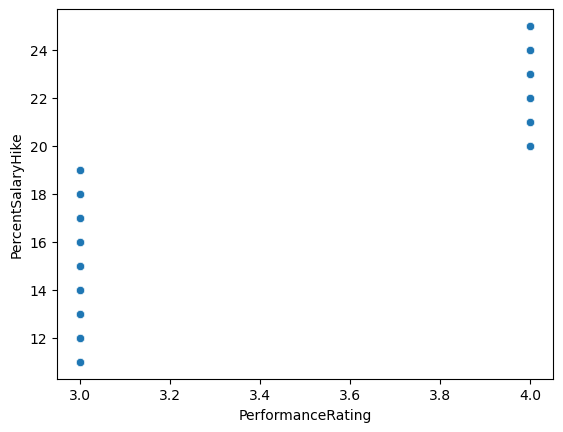

In [8]:
sns.scatterplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

In [ ]:
PerformanceRating is highly overall correlated with PercentSalaryHike	

In [ ]:
YearsSinceLastPromotion is highly overall correlated with YearsAtCompany	

<Axes: xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

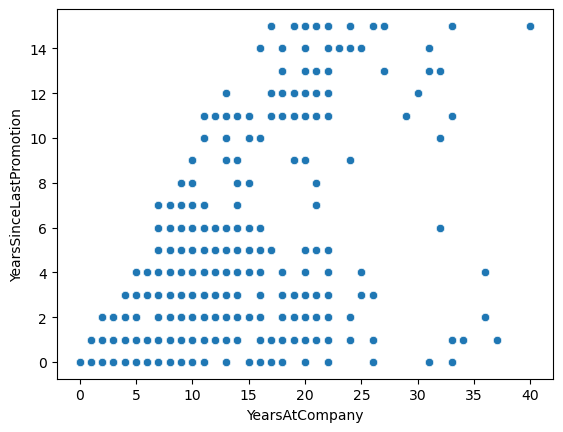

In [9]:
sns.scatterplot(x='YearsAtCompany',y='YearsSinceLastPromotion',data=df)

C:\Users\sahus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


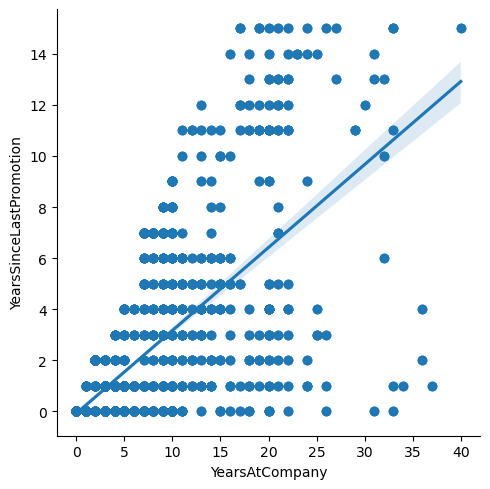

In [12]:
sns.lmplot(x='YearsAtCompany',y='YearsSinceLastPromotion',data=df)

In [ ]:
--------------------------------------------------------------------------

In [ ]:
problem :- YearsSinceLastPromotion is highly overall correlated with YearsAtCompany 

In [ ]:
---------------------------------------------------------------------------------------

In [ ]:
key insights

In [25]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
df['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

<Axes: ylabel='count'>

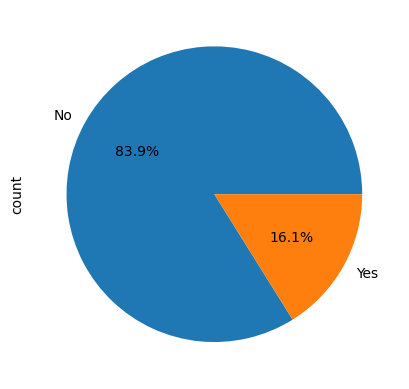

In [72]:
#total 16 % of attribution
df['Attrition'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

<Axes: xlabel='Gender,Attrition'>

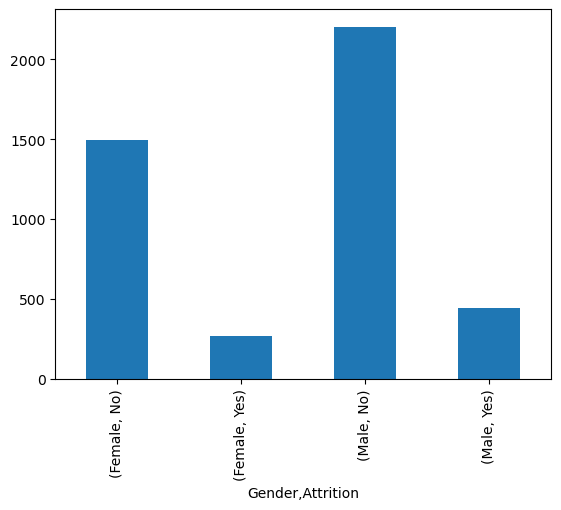

In [28]:
# attribution by gender

df.groupby('Gender')['Attrition'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Attrition'>

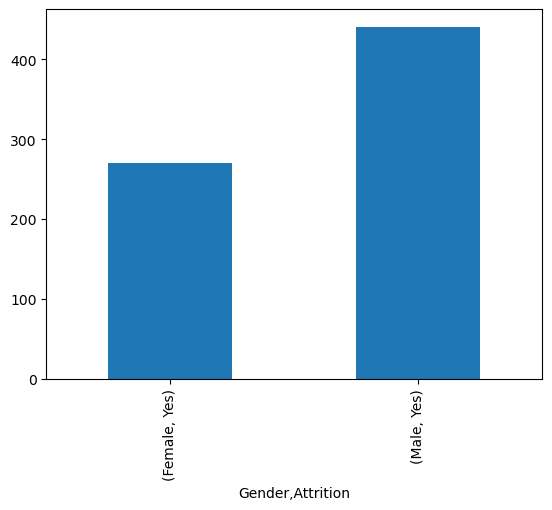

In [73]:
# attribution by gender
x=df[df['Attrition']=='Yes']
x.groupby('Gender')['Attrition'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

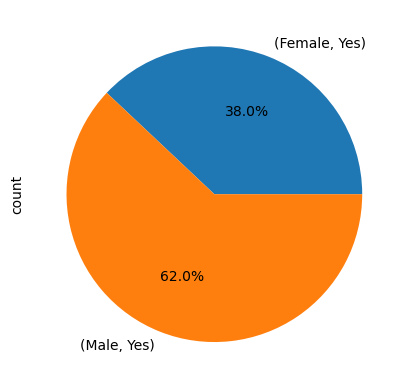

In [74]:
# attribution by gender
x=df[df['Attrition']=='Yes']
x.groupby('Gender')['Attrition'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df['Attrition'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

<Axes: ylabel='count'>

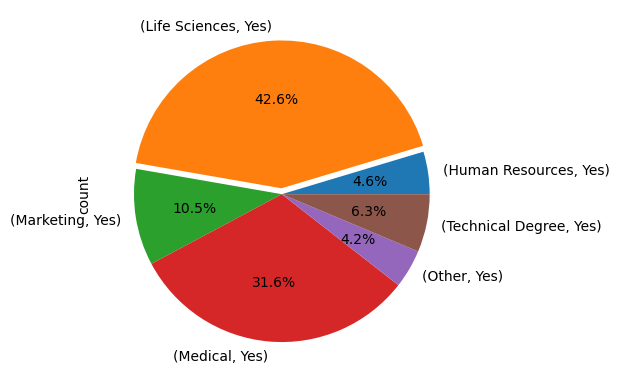

In [75]:
#attrition by education
# attribution by gender
x=df[df['Attrition']=='Yes']
x.groupby('EducationField')['Attrition'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0,0.04,0,0,0,0])

In [77]:
x.groupby('EducationField')['Attrition'].value_counts()

EducationField    Attrition
Human Resources   Yes           33
Life Sciences     Yes          303
Marketing         Yes           75
Medical           Yes          225
Other             Yes           30
Technical Degree  Yes           45
Name: count, dtype: int64

<Axes: ylabel='count'>

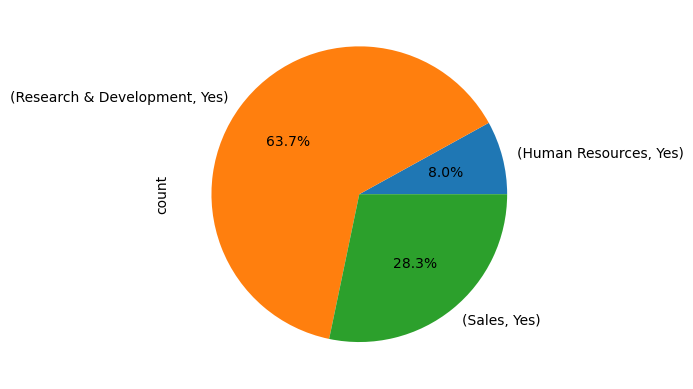

In [78]:
# attrition by department
x=df[df['Attrition']=='Yes']
x.groupby('Department')['Attrition'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

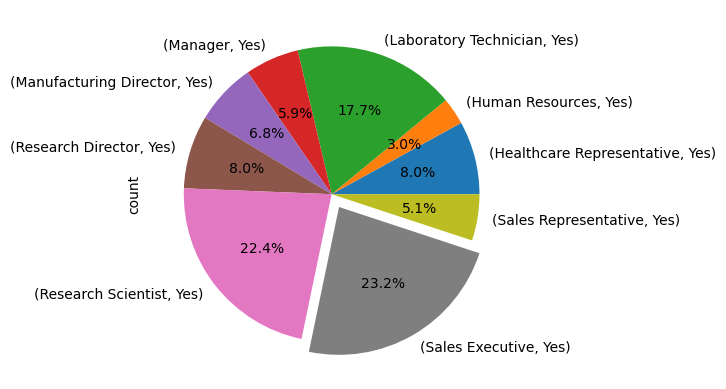

In [79]:
# attrition by Joblevel
x=df[df['Attrition']=='Yes']
x.groupby('JobRole')['Attrition'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0,0,0,0,0,0,0,0.1,0])

In [46]:
x.groupby('JobRole')['Attrition'].value_counts()

JobRole                    Attrition
Healthcare Representative  No           336
Human Resources            No           135
Laboratory Technician      No           651
Manager                    No           264
Manufacturing Director     No           387
Research Director          No           183
Research Scientist         No           717
Sales Executive            No           813
Sales Representative       No           213
Name: count, dtype: int64

In [89]:
# attrition by age
h=df[df['Attrition']=='Yes']
h

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
13,14,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,Male,...,10.0,4,10,9,9,1.0,2.0,2.0,2,3
28,29,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,19.0,2,1,0,0,4.0,3.0,1.0,2,3
30,31,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,5.0,5,3,0,2,1.0,2.0,3.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,4382,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,Female,...,4.0,2,4,0,1,3.0,4.0,2.0,3,4
4386,4387,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,Male,...,8.0,2,5,0,4,3.0,4.0,1.0,2,4
4388,4389,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,13.0,2,9,1,7,1.0,1.0,4.0,3,3
4391,4392,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3


In [56]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [90]:
# creating a function for separating age 
def age_groups(age):
    if 18<=age<=25:
        return '18--25'
    elif 26<=age<=35:
        return '26--35'
    elif 36<=age<=45:
        return '36--45'
    elif 46<=age<=55:
        return '46--55'
    else:
        return '56 and above'

In [92]:
h['Age']=h['Age'].apply(age_groups)

C:\Users\sahus\AppData\Local\Temp\ipykernel_2376\3484447865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['Age']=h['Age'].apply(age_groups)


In [93]:
h

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,2,26--35,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
6,7,26--35,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
13,14,46--55,Yes,Non-Travel,Research & Development,1,1,Medical,1,Male,...,10.0,4,10,9,9,1.0,2.0,2.0,2,3
28,29,36--45,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,19.0,2,1,0,0,4.0,3.0,1.0,2,3
30,31,26--35,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,5.0,5,3,0,2,1.0,2.0,3.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,4382,26--35,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,Female,...,4.0,2,4,0,1,3.0,4.0,2.0,3,4
4386,4387,26--35,Yes,Travel_Rarely,Sales,11,4,Marketing,1,Male,...,8.0,2,5,0,4,3.0,4.0,1.0,2,4
4388,4389,26--35,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,13.0,2,9,1,7,1.0,1.0,4.0,3,3
4391,4392,26--35,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3


<Axes: xlabel='Age', ylabel='count'>

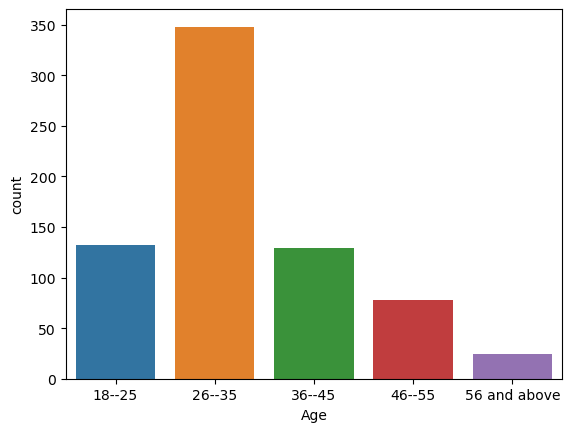

In [95]:
sns.countplot(x='Age',data=h,order=['18--25','26--35','36--45','46--55','56 and above'])

In [25]:
# attrition by MonthlyIncome
m=df[df['Attrition']=='Yes']
m

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
13,14,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,Male,...,10.0,4,10,9,9,1.0,2.0,2.0,2,3
28,29,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,19.0,2,1,0,0,4.0,3.0,1.0,2,3
30,31,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,5.0,5,3,0,2,1.0,2.0,3.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,4382,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,Female,...,4.0,2,4,0,1,3.0,4.0,2.0,3,4
4386,4387,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,Male,...,8.0,2,5,0,4,3.0,4.0,1.0,2,4
4388,4389,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,13.0,2,9,1,7,1.0,1.0,4.0,3,3
4391,4392,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3


In [26]:
# attrition by MonthlyIncome

def MonthlyIncome_groups(income):
    if 10000<=income<=30000:
        return '10k-30k'
    elif 30001<=income<=50000:
        return '30k-50k'
    elif 50001<=income<=70000:
        return '50k-70k'
    elif 70001<=income<=90000:
        return '70k-90k'
    elif 90001<=income<=110000:
        return '90k-110k'
    elif 110001<=income<=130000:                 
        return '110k-130k'
    else:
        return '130k above'

In [27]:
m['MonthlyIncome']=m['MonthlyIncome'].apply(MonthlyIncome_groups)

C:\Users\sahus\AppData\Local\Temp\ipykernel_12616\1048076236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['MonthlyIncome']=m['MonthlyIncome'].apply(MonthlyIncome_groups)


In [28]:
m['MonthlyIncome']

1        30k-50k
6        50k-70k
13       50k-70k
28      90k-110k
30       50k-70k
          ...   
4381     10k-30k
4386     70k-90k
4388     50k-70k
4391     10k-30k
4402     30k-50k
Name: MonthlyIncome, Length: 711, dtype: object

<Axes: xlabel='MonthlyIncome', ylabel='count'>

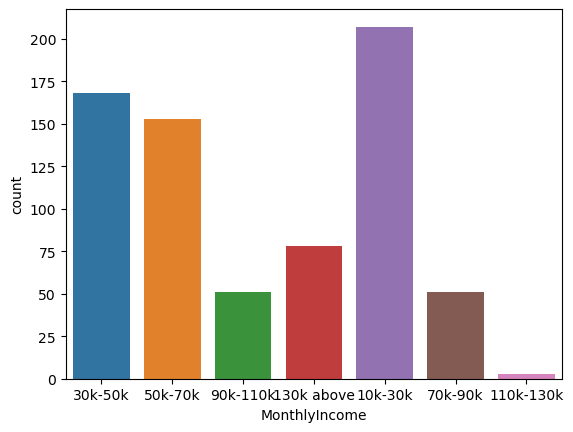

In [29]:
sns.countplot(x='MonthlyIncome',data=m)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

<Axes: xlabel='MonthlyIncome', ylabel='YearsAtCompany'>

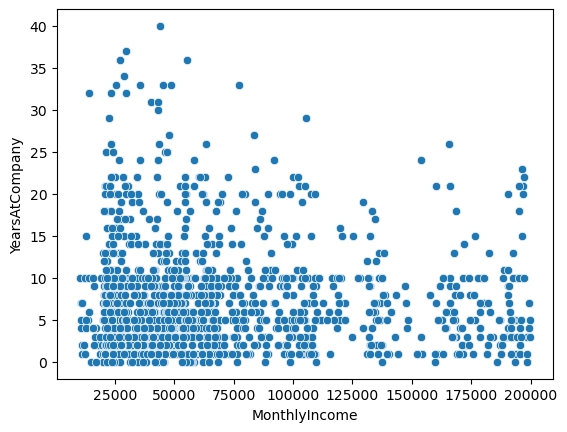

In [138]:
sns.scatterplot(x='MonthlyIncome',y='YearsAtCompany',data=df)

# 

In [ ]:
key insight 
==> No linear relation between x='MonthlyIncome',y='YearsAtCompany'
==> Attrition rate of the employee is 16.1%
==> MonthlyIncome range between 10k- 30k where most employees left the company
==> Age range between 26-35 years old where most employees left the company
==> Male employees have attrition percent(62%) as compared to female(38%) 
==> Employees who belong to department Research and development has 63 % atrribution rate
==> Employees whose educationField was Life Science has 42.6 % attribution rate

In [ ]:
solution from my side 

->Establish mentorship program for young employees(26-35) to provide carrer guidance,opportunitiess for professional development.
  this can help company to retain the employees.
    
->perform a skill gap analysis mainly in department of Research and development and educationField  Life Science, 
and if they lack opportunities to develop new skills provide them the training.

-->Implement  a recognition and reward perform to boost there morale.

--> Encourage regular feedback session and  try to the address all concerns of employees 